Загрузим датасет с картинками линий с гугл-диска

In [1]:
!gdown 1Ny5_EqNE2oe-y-b3tsWuhstAe_Oseyfw

Downloading...
From: https://drive.google.com/uc?id=1Ny5_EqNE2oe-y-b3tsWuhstAe_Oseyfw
To: /content/генератор_фото.zip
100% 10.1k/10.1k [00:00<00:00, 23.3MB/s]


Разархивируем датасет

In [2]:
! unzip /content/генератор_фото.zip

Archive:  /content/генератор_фото.zip
   creating: генератор_фото/
  inflating: генератор_фото/верх.png  
   creating: генератор_фото/дата_сет/
   creating: генератор_фото/дата_сет/верх/
  inflating: генератор_фото/дата_сет/верх/верх.png  
   creating: генератор_фото/дата_сет/диагональ_лево/
  inflating: генератор_фото/дата_сет/диагональ_лево/диагональ_лево.png  
   creating: генератор_фото/дата_сет/диагональ_право/
  inflating: генератор_фото/дата_сет/диагональ_право/диагональ_право.png  
   creating: генератор_фото/дата_сет/лево/
  inflating: генератор_фото/дата_сет/лево/лево.png  
   creating: генератор_фото/дата_сет/нет_линий/
  inflating: генератор_фото/дата_сет/нет_линий/нет_линий.png  
   creating: генератор_фото/дата_сет/низ/
  inflating: генератор_фото/дата_сет/низ/низ.png  
   creating: генератор_фото/дата_сет/право/
  inflating: генератор_фото/дата_сет/право/право.png  
   creating: генератор_фото/дата_сет/черный/
  inflating: генератор_фото/дата_сет/черный/черный.png  
  in

Импортируем необходимые библиотеки

In [3]:
import cv2
import os
import numpy as np
import random

Напишем функцию, немного зашумляющую фотографии линии, что позволит нам расширить датасет

In [4]:
def sp_noise(image,prob):

    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 100
            else:
                output[i][j] = image[i][j]
    return output


In [5]:
up_photo = '/content/генератор_фото/верх.png'
down_photo = '/content/генератор_фото/низ.png'
right_photo = '/content/генератор_фото/право.png'
left_photo = '/content/генератор_фото/лево.png'
noline_photo = '/content/генератор_фото/нет_линий.png'
ld_photo = '/content/генератор_фото/диагональ_лево.png'
rd_photo = '/content/генератор_фото/диагональ_право.png'
black_photo = '/content/генератор_фото/черный.png'

In [6]:
import tensorflow as tf
from PIL import Image
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

Датасете находятся 8 видов картинок линий размера 2*2 пикселя. Идея заключается в том, что нейросеть должна научиться распознавать эти виды линий на картике и заменять их тем самым превращая картинку в рисунок из штрихов.

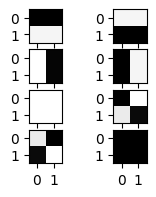

In [61]:
list_photo = [up_photo, down_photo, right_photo, left_photo,
              noline_photo, ld_photo, rd_photo, black_photo]
fig = plt.figure(figsize=(2, 2))
for index, photo in enumerate(list_photo):
  fig.add_subplot(4, 2, index+1)
  img = Image.open(photo)
  plt.imshow(img)



Размножим картинки с помощью ранее написанной зашумляющей функции sp_noise

In [27]:
i = 0
while i <100000:
    image = cv2.imread(up_photo,0)# Only for grayscale image
    noise_img = sp_noise(image,0.05)

    cv2.imwrite(f'/content/генератор_фото/дата_сет/верх/sp_noise_{i}.jpg', noise_img)
    i+=1
i = 0
while i <100000:
    image = cv2.imread(down_photo,0)# Only for grayscale image
    noise_img = sp_noise(image,0.05)
    cv2.imwrite(f'/content/генератор_фото/дата_сет/низ/sp_noise_{i}.jpg', noise_img)
    i+=1
i = 0
while i < 100000:
    image = cv2.imread(noline_photo,0) # Only for grayscale image
    noise_img = sp_noise(image,0.05)
    cv2.imwrite(f'/content/генератор_фото/дата_сет/нет_линий/sp_noise_{i}.jpg', noise_img)
    i+=1
i = 0
while i < 100000:
    image = cv2.imread(right_photo,0) # Only for grayscale image
    noise_img = sp_noise(image,0.05)
    cv2.imwrite(f'/content/генератор_фото/дата_сет/право/sp_noise_{i}.jpg', noise_img)
    i+=1
i = 0
while i < 100000:
    image = cv2.imread(left_photo,0) # Only for grayscale image
    noise_img = sp_noise(image,0.05)
    cv2.imwrite(f'/content/генератор_фото/дата_сет/лево/sp_noise_{i}.jpg', noise_img)
    i+=1
i = 0
while i < 100000:
    image = cv2.imread(ld_photo,0) # Only for grayscale image
    noise_img = sp_noise(image,0.05)
    cv2.imwrite(f'/content/генератор_фото/дата_сет/диагональ_лево/sp_noise_{i}.jpg', noise_img)
    i+=1
while i < 100000:
    image = cv2.imread(rd_photo,0) # Only for grayscale image
    noise_img = sp_noise(image,0.05)
    cv2.imwrite(f'/content/генератор_фото/дата_сет/диагональ_право/sp_noise_{i}.jpg', noise_img)
    i+=1
while i < 100000:
    image = cv2.imread(black_photo,0) # Only for grayscale image
    noise_img = sp_noise(image,0.05)
    cv2.imwrite(f'/content/генератор_фото/дата_сет/черный/sp_noise_{i}.jpg', noise_img)
    i+=1

In [28]:
path_to_files = '/content/генератор_фото/дата_сет/'

Переведем картинки в датасет и разделим его на тренировочную и валидационную выборку

In [29]:
image_size = (2, 2)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path_to_files,
    validation_split=0.2,
    subset="training",
    seed=123,
    color_mode='grayscale',
    labels = "inferred",
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path_to_files,
    validation_split=0.2,
    subset="validation",
    seed=123,
    color_mode='grayscale',
    labels = "inferred",
    image_size=image_size,
    batch_size=batch_size,
)
train_ds

Found 600008 files belonging to 8 classes.
Using 480007 files for training.
Found 600008 files belonging to 8 classes.
Using 120001 files for validation.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 2, 2, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Создадим словарь с лейблами исходных классов линий

In [30]:
res = dict(zip([0,1,2,3,4,5,6,7], train_ds.class_names))
res

{0: 'верх',
 1: 'диагональ_лево',
 2: 'диагональ_право',
 3: 'лево',
 4: 'нет_линий',
 5: 'низ',
 6: 'право',
 7: 'черный'}

Для улучшения производительности и уменьшения задержки в процессе обучения модели

In [31]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

Импортируем библиотеки для обучения

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
import keras
from keras.callbacks import EarlyStopping

Напишем полносвязную нейронную сеть для классификации картинок

In [33]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(Dense(516, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(8, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', verbose=1, patience=200)


result = model.fit(train_ds, validation_data=(val_ds), epochs=10, batch_size=32, verbose=2, callbacks=[es])


Epoch 1/10
15001/15001 - 107s - loss: 0.1070 - accuracy: 0.9627 - val_loss: 0.0792 - val_accuracy: 0.9684 - 107s/epoch - 7ms/step
Epoch 2/10
15001/15001 - 105s - loss: 0.0756 - accuracy: 0.9697 - val_loss: 0.0742 - val_accuracy: 0.9698 - 105s/epoch - 7ms/step
Epoch 3/10
15001/15001 - 104s - loss: 0.0693 - accuracy: 0.9713 - val_loss: 0.0674 - val_accuracy: 0.9709 - 104s/epoch - 7ms/step
Epoch 4/10
15001/15001 - 102s - loss: 0.0666 - accuracy: 0.9717 - val_loss: 0.0675 - val_accuracy: 0.9711 - 102s/epoch - 7ms/step
Epoch 5/10
15001/15001 - 101s - loss: 0.0654 - accuracy: 0.9720 - val_loss: 0.0685 - val_accuracy: 0.9717 - 101s/epoch - 7ms/step
Epoch 6/10
15001/15001 - 104s - loss: 0.0655 - accuracy: 0.9721 - val_loss: 0.0667 - val_accuracy: 0.9717 - 104s/epoch - 7ms/step
Epoch 7/10
15001/15001 - 94s - loss: 0.0648 - accuracy: 0.9721 - val_loss: 0.0637 - val_accuracy: 0.9720 - 94s/epoch - 6ms/step
Epoch 8/10
15001/15001 - 118s - loss: 0.0635 - accuracy: 0.9725 - val_loss: 0.0623 - val_acc

Загрузим фото для примера с гугл-диска

In [41]:
!gdown 1PWz-Jpw4lZ1Z7tTxBMmYoINW_Q-wLIsZ

Downloading...
From: https://drive.google.com/uc?id=1PWz-Jpw4lZ1Z7tTxBMmYoINW_Q-wLIsZ
To: /content/Duejn-Dzhonson.jpg
100% 103k/103k [00:00<00:00, 82.0MB/s]


In [42]:
photo = '/content/Duejn-Dzhonson.jpg'

Импортируем библиотеки для обработки фото

In [43]:
from PIL import Image
import matplotlib.pyplot as plt

Откроем фото, переведем его в grayscale и изменим размер, для более быстрой обработки

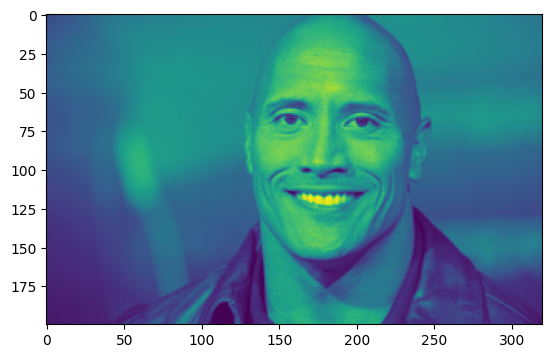

In [46]:
image = Image.open(photo).convert('L')
img=image.resize(((image.size[0]//4), (image.size[1]//4)))
plt.imshow(img)

In [47]:
path = '/content/генератор_фото/'

Пройдемся нейронной сетью по фотографии и заменим участки 2*2 пикселя на фотографии на результаты предсказания модели

In [48]:
for i in range(0, img.size[0], 2):
    for j in range(0, img.size[1], 2):
        try:
            img1 = Image.open(path+res[max([np.argmax(i) for i in model.predict(np.expand_dims(img.crop((i,  j, i+2, j+2)), 0))])]+'.png').convert('L')
            img.paste(img1, (i, j))
        except:
            continue

Выходные данные были обрезаны до нескольких последних строк (5000).
1/1 [==============================] - 0s 44ms/step


Выведем результат

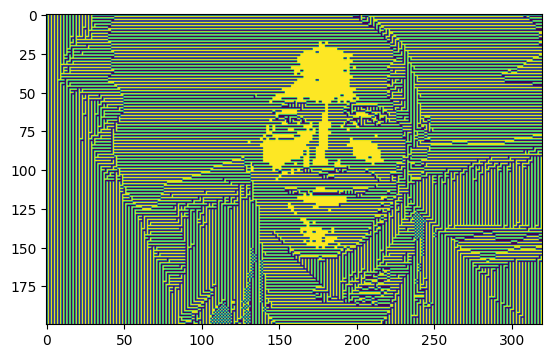

In [50]:
plt.imshow(img)